# Section 1: Business Understanding

I aim to conduct a brief study that seeks to answer questions related to the habits and age category of people who suffer from cardiovascular problems.

- Question 1: What is the extent of the influence of age on cardiovascular diseases?
- Question 2: What habits could be associated with heart diseases?
- Question 3: Could getting good sleep prevent cardiovascular problems?

# Import library

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# Section 2: Data Understanding

# Dataset

In [4]:
df = pd.read_csv('C:/Users/pablo/Desktop/Cursos/data_scientist_nanodegree/data/heart_2020_cleaned.csv')
df_features = df.drop('HeartDisease', axis = 1)
df_target = df['HeartDisease']

## General information

In [5]:
column_names = list(df.columns)

num_rows = df.shape[0]
num_cols = df.shape[1]

missing_values = df.isnull()
num_missing_values = missing_values.sum()

print('List of columns:', column_names)
print()
print('{} Rows x {} columns'.format(num_rows, num_cols))
print()
print('Number of missing values per column:', num_missing_values)

List of columns: ['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']

319795 Rows x 18 columns

Number of missing values per column: HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


## Additional Information

In [6]:
#if we wanted to obtain more information, we could consult the info and describe commands
df.info()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [7]:
print('df with only float64 columns')
display(df.select_dtypes('float64'))
print()
print('df with only objects columns')
display(df.select_dtypes('object'))

df with only float64 columns


,BMI,PhysicalHealth,MentalHealth,SleepTime
0,16.60,3.0,30.0,5.0
1,20.34,0.0,0.0,7.0
2,26.58,20.0,30.0,8.0
3,24.21,0.0,0.0,6.0
4,23.71,28.0,0.0,8.0
...,...,...,...,...
319790,27.41,7.0,0.0,6.0
319791,29.84,0.0,0.0,5.0
319792,24.24,0.0,0.0,6.0
319793,32.81,0.0,0.0,12.0



df with only objects columns


,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No
2,No,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No
3,No,No,No,No,No,Female,75-79,White,No,No,Good,No,No,Yes
4,No,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,Yes,No,No,Yes,Male,60-64,Hispanic,Yes,No,Fair,Yes,No,No
319791,No,Yes,No,No,No,Male,35-39,Hispanic,No,Yes,Very good,Yes,No,No
319792,No,No,No,No,No,Female,45-49,Hispanic,No,Yes,Good,No,No,No
319793,No,No,No,No,No,Female,25-29,Hispanic,No,No,Good,No,No,No


# Section 3: Prepare data

## Cleaning

Check if the dataframe has duplicate rows and if it contains NaN values. In this case, duplicate rows were found and are removed. On the other hand, no NaN values were found, so nothing is done in this regard.

In [8]:
print('number of duplicate rows: ', df.shape[0] - df.drop_duplicates().shape[0])
print('number of nans rows: ', df.shape[0] - df.dropna().shape[0])

df = df.drop_duplicates()

number of duplicate rows:  18078
number of nans rows:  0


## Transform Data

All categorical variables are converted to numeric.

In [24]:
#determine objects columns
columns = np.array((df.select_dtypes('object')).columns)

def categorical_to_numbers(df, columns):
    '''
    return dataframe just with numerical data

    input:
        df : pandas dataframe
        columns: list of objects

    output:
        df: pandas dataframe with categorical values transformed to numbers
    '''
    for column in columns:
        encoder = LabelEncoder()
        #print(column)
        df[column] = encoder.fit_transform(df[column])
        dictionary = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
        #print(dictionary)
    return df

df_new = categorical_to_numbers(df.copy(), columns)
df_new.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


# Section 4: Modeling

# Section 5: Evaluate the results

## Generic evaluation

A short analysis associated with the correlation of the characteristics is performed.

<AxesSubplot:>

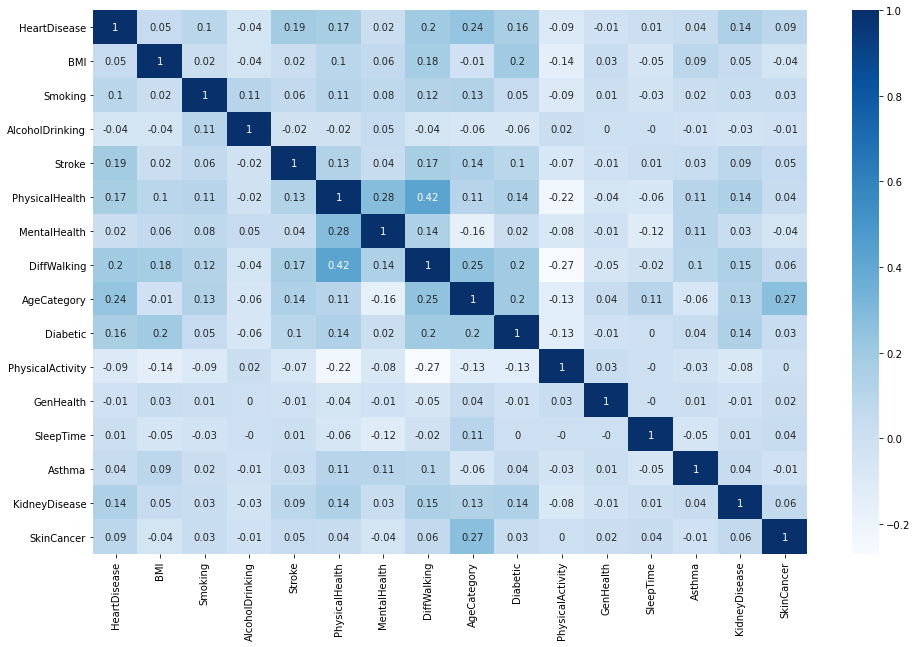

In [25]:
correlation = (df_new.drop(['Sex','Race'],axis = 1)).corr().round(2)
plt.figure(figsize=(16,10))
sns.heatmap(correlation, annot = True, cmap='Blues')

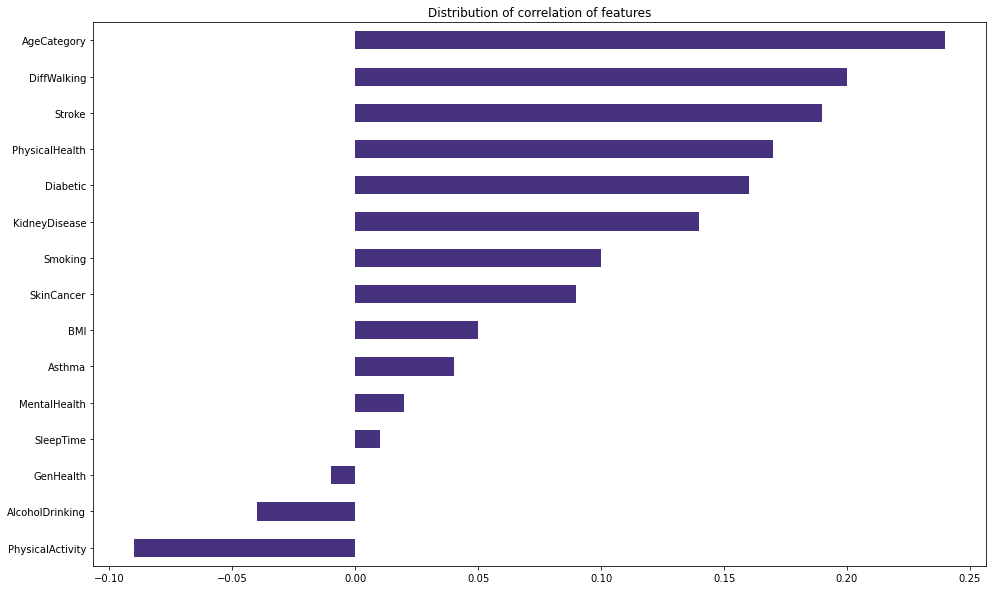

In [26]:
sns.set_palette('viridis')
plt.figure(figsize = (16,10))
plt.title('Distribution of correlation of features')
(correlation['HeartDisease']).sort_values()[:-1].plot.barh()
plt.show()

# Question 1: What is the extent of the influence of age on cardiovascular diseases?

In the following analysis, the proportion of people with heart diseases is graphed as a function of each category. It can be observed that there is an increase in the proportion as age increases.

{0: '18-24', 1: '25-29', 2: '30-34', 3: '35-39', 4: '40-44', 5: '45-49', 6: '50-54', 7: '55-59', 8: '60-64', 9: '65-69', 10: '70-74', 11: '75-79', 12: '80 or older'}


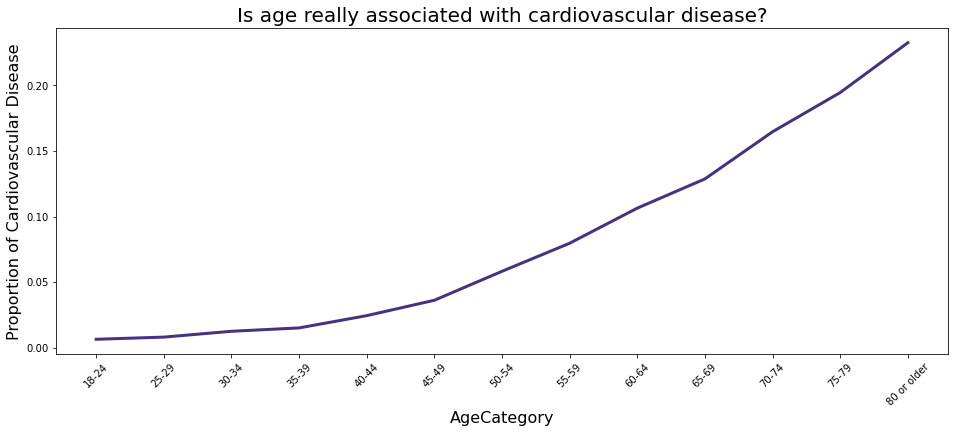

In [27]:
# Original dictionary
dict_orig = {'18-24': 0, '25-29': 1, '30-34': 2, '35-39': 3, '40-44': 4, '45-49': 5, '50-54': 6, '55-59': 7, '60-64': 8, '65-69': 9, '70-74': 10, '75-79': 11, '80 or older': 12}

# Invert the keys and values.
dict_invert = {v: k for k, v in dict_orig.items()}

print(dict_invert)

list_of_agecategory = []
for i in dict_orig:
    list_of_agecategory.append(i)

# we replace label to category
df_new['AgeCategory'] = df_new['AgeCategory'].replace(dict_invert)
df_plot_agecategory = df_new.groupby(['AgeCategory']).mean()

# graph
plt.figure(figsize=(16,6))
plt.title('Is age really associated with cardiovascular disease?',fontsize = 20)
plt.ylabel('Proportion of Cardiovascular Disease', fontsize = 16)
plt.xlabel('AgeCategory', fontsize = 16)

#df_plot_agecategory['HeartDisease'].plot(fontsize= 10, linewidth = 3)
plt.xticks(rotation = 45)
plt.plot(list_of_agecategory, df_plot_agecategory['HeartDisease'] , linewidth = 3)


Additionally, according to age, it is shown that other types of diseases prevail. The older the age, the more likely it is to have Skin Cancer, Difficulty Walking, Heart Disease, among others.

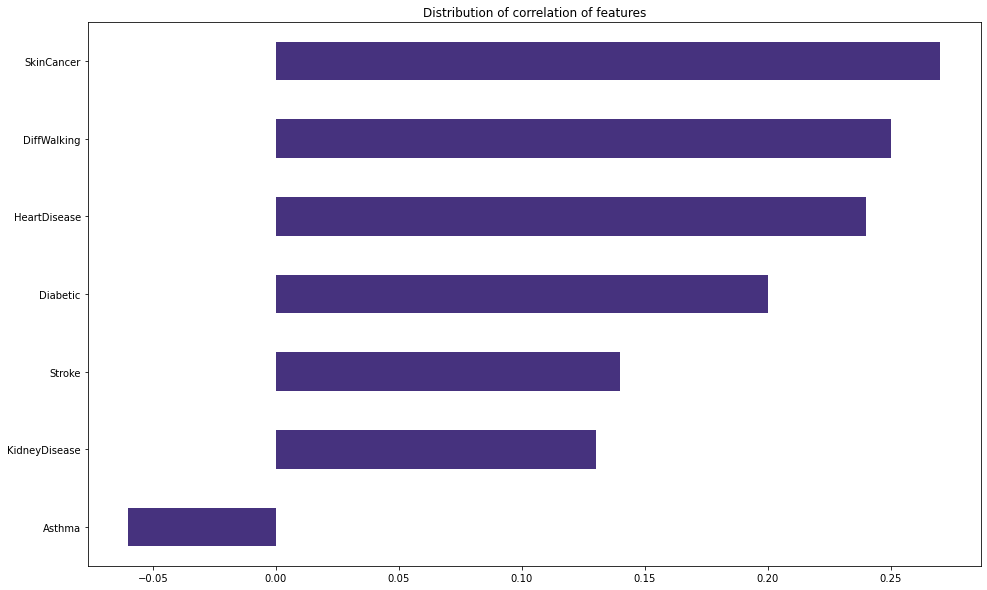

In [30]:
df_new = categorical_to_numbers(df.copy(), columns)
# disease
correlation2 = df_new[['HeartDisease', 'Diabetic', 'Stroke','DiffWalking', 'Asthma', 'KidneyDisease','SkinCancer','AgeCategory']].corr().round(2)

sns.set_palette('viridis')
plt.figure(figsize = (16,10))
plt.title('Distribution of correlation of features')
(correlation2['AgeCategory']).sort_values()[:-1].plot.barh()
plt.show()

## Question 2: What habits could be associated with heart diseases?

In this case, the existence of three habits is considered: Smoking, Drinking Alcohol, and 'Sleep Time' associated with whether one sleeps well or not. The latter is analyzed in the following section. On the other hand, according to the analyses conducted, Smoking and Drinking Alcohol would be related to a higher likelihood of having cardiovascular problems.

In [31]:
df_habits = df[['Smoking','AlcoholDrinking','PhysicalActivity','SleepTime','HeartDisease']]

In [32]:
df_smoking = df_habits['Smoking']=='Yes'
df_no_smoking = df_habits['Smoking']=='No'

print('Smoking')
print('Yes',(df_habits[df_smoking]['HeartDisease']=='Yes').sum()/(df_smoking).sum(), '%')
print('No',(df_habits[df_smoking]['HeartDisease']=='No').sum()/(df_smoking).sum(), '%')

print('No-Smoking')
print('Yes',(df_habits[df_no_smoking]['HeartDisease']=='Yes').sum()/(df_no_smoking).sum(), '%')
print('No',(df_habits[df_no_smoking]['HeartDisease']=='No').sum()/(df_no_smoking).sum(), '%')

Smoking
Yes 0.12540324163101918 %
No 0.8745967583689808 %
No-Smoking
Yes 0.06473449905915829 %
No 0.9352655009408417 %


In [33]:
df_phyactivity = df_habits['PhysicalActivity']=='Yes'
df_no_phyactivity = df_habits['PhysicalActivity']=='No'

print('Physical Activity')
print('Yes',(df_habits[df_phyactivity]['HeartDisease']=='Yes').sum()/(df_phyactivity).sum(), '%')
print('No',(df_habits[df_phyactivity]['HeartDisease']=='No').sum()/(df_phyactivity).sum(), '%')

print('No-Physical Activity')
print('Yes',(df_habits[df_no_phyactivity]['HeartDisease']=='Yes').sum()/(df_no_phyactivity).sum(), '%')
print('No',(df_habits[df_no_phyactivity]['HeartDisease']=='No').sum()/(df_no_phyactivity).sum(), '%')

Physical Activity
Yes 0.07542575907504817 %
No 0.9245742409249518 %
No-Physical Activity
Yes 0.1385877568192974 %
No 0.8614122431807026 %


## Question 3: Could getting good sleep prevent cardiovascular problems?

While it is true that this is a simple analysis, it would show us that sleeping less than 8 hours would be associated, in proportion, with a higher number of people with heart diseases. It is worth noting that sleeping for 4 hours could be very detrimental to health.

In [38]:
hours = [2.0,3.0,4.0,5.0,6.0,7.0,8.0, 9.0, 10.0, 11.0, 12.0]
no_sleep_list = []
num_samples = []

for sleep_time in hours:
    df_no_sleep = df_habits['SleepTime']<sleep_time

    no_sleep_list.append((df_habits[df_no_sleep]['HeartDisease']=='Yes').sum()/(df_no_sleep).sum())
    num_samples.append(df_no_sleep.sum())

Text(0.5, 0, 'Sleep Time')

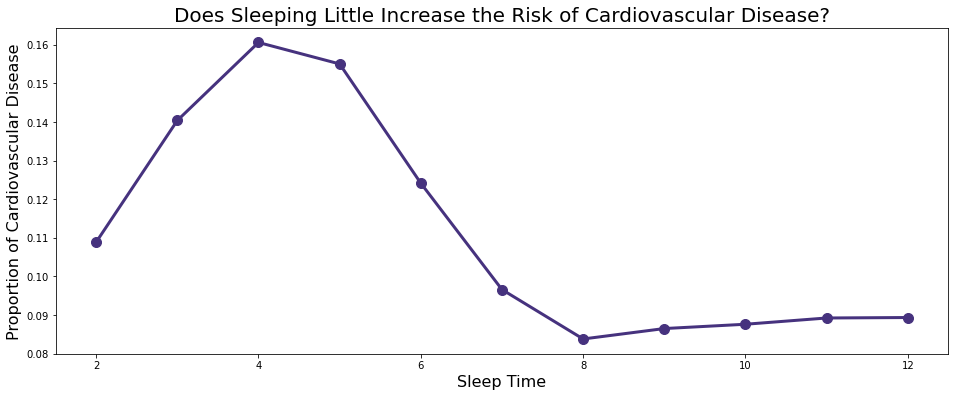

In [39]:
plt.figure(figsize=(16,6))
plt.title('Does Sleeping Little Increase the Risk of Cardiovascular Disease?', fontsize = 20)
plt.plot(hours, no_sleep_list, 'o-', linewidth = 3, markersize = 10)
plt.ylabel('Proportion of Cardiovascular Disease', fontsize = 16)
plt.xlabel('Sleep Time', fontsize = 16)
#print(num_samples)